In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [121]:
def fit_and_predict(x, y, degree, finer_step=0.1):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(x, y)

    # Create new x values with finer resolution
    x_finer = np.arange(x.min(), x.max() + finer_step, finer_step).reshape(-1, 1)
    y_pred_finer = pipeline.predict(x_finer)

    return x_finer, y_pred_finer, pipeline

In [186]:
encoding = "enhanced_pauli_encoding"
ansatz_global2d = "StronglyEntangling"
ansatz_blocks = "LocalTwoDesign"
cost = "global"
n_samples = 3000

n_qubits = 6

m_small = 2
subgroups_small = 3

m_big = 3
subgroups_big = 2

m_one = 1
subgroups_one = 6

n_circuit_layers = 2
periodic_layers_global2d = 5
periodic_layers = 1
subperiodic_layers = 5

In [187]:
#matplotlib.use("pgf")
sns.set_style("whitegrid")
matplotlib.rcParams.update({
    "pgf.preamble": (r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"), 
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
matplotlib.rcParams['text.latex.preamble'] = (r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}")


In [188]:
# Read data for L>1
path_template = "/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/logs/{encoding}/{ansatz}_{cost}_qubits_{n_qubits:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{periodic_layers_global2d:02}/{n_samples:05}_samples"
path = path_template.format(encoding=encoding,ansatz=ansatz_global2d, cost=cost, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, periodic_layers_global2d=periodic_layers_global2d, n_samples=n_samples)

path_blocks_template = "/Users/marioherreroglez/Desktop/PQCs_Fourier_Coeffs/logs/{encoding}/{ansatz}_{cost}_qubits_{n_qubits:02}_m_{m:02}_subgroups_{subgroups:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{periodic_layers:02}_subperiodic_layers_{subperiodic_layers:02}/{n_samples:05}_samples"

path_small = path_blocks_template.format(encoding=encoding, ansatz=ansatz_blocks, cost=cost, n_qubits=n_qubits, m=m_small, subgroups=subgroups_small, n_circuit_layers=n_circuit_layers, periodic_layers=periodic_layers, subperiodic_layers=subperiodic_layers, n_samples=n_samples)
path_big = path_blocks_template.format(encoding=encoding, ansatz=ansatz_blocks, cost=cost, n_qubits=n_qubits, m=m_big, subgroups=subgroups_big, n_circuit_layers=n_circuit_layers, periodic_layers=periodic_layers, subperiodic_layers=subperiodic_layers, n_samples=n_samples)
path_onlyone = path_blocks_template.format(encoding=encoding, ansatz=ansatz_blocks, cost=cost, n_qubits=n_qubits, m=m_one, subgroups=subgroups_one, n_circuit_layers=n_circuit_layers, periodic_layers=periodic_layers, subperiodic_layers=subperiodic_layers, n_samples=n_samples)
# Read redundancies.pkl
redundancies = np.load(path + "/redundancies.pkl", allow_pickle=True)
redundancies = list(redundancies[list(redundancies.keys())[-1]].values())
redundancies = redundancies[len(redundancies)//2:]
# Read abs_coeffs_avg.npy
var_blocks_one = np.load(path_onlyone + "/abs_coeffs_var.npy")
var_blocks_small = np.load(path_small + "/abs_coeffs_var.npy")
var_blocks_big = np.load(path_big + "/abs_coeffs_var.npy")
var_global2d = np.load(path + "/abs_coeffs_var.npy")




In [ ]:
def bound_variance_several_layers():
    

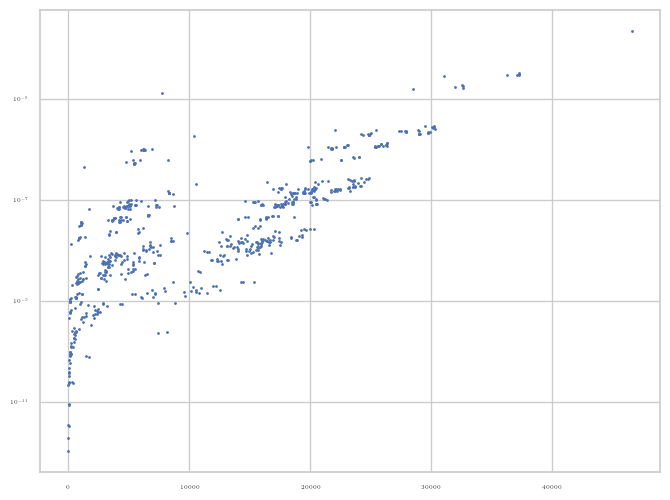

In [189]:
unique_redundancies = np.unique(redundancies)
max_var = np.zeros_like(unique_redundancies,dtype=float)
data = np.column_stack((redundancies, var_blocks_one))
for i in range(len(unique_redundancies)):
    max_var[i] = np.max(data[data[:,0]==unique_redundancies[i],1])
plt.figure(figsize=(8,6))
plt.scatter(unique_redundancies, max_var, s=1)
plt.yscale('log')

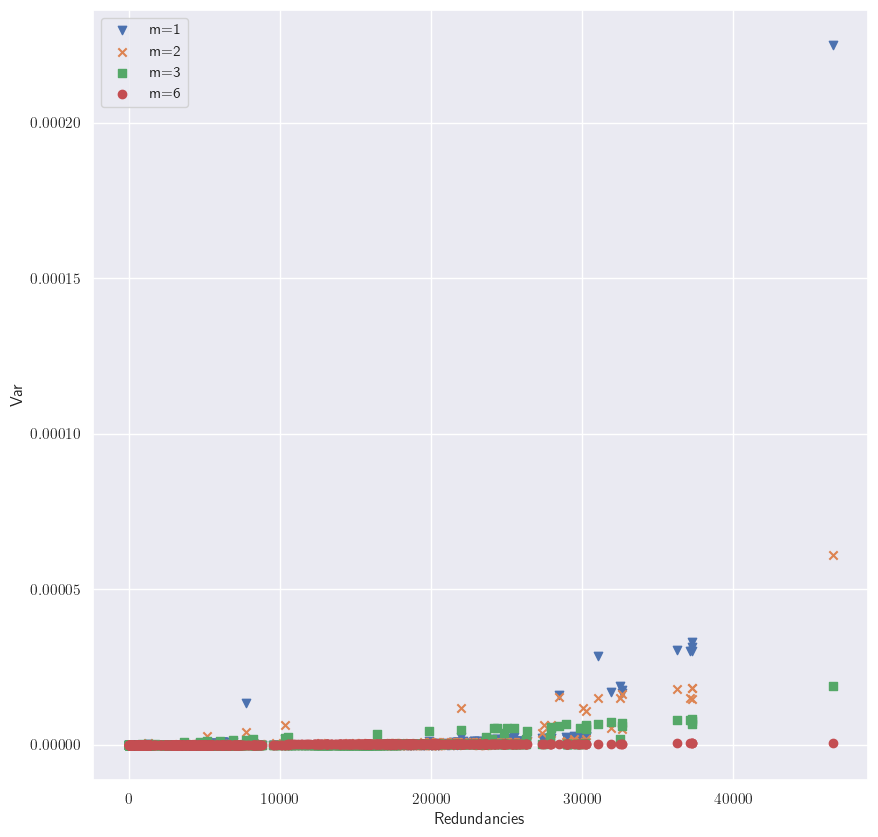

In [190]:
# plot 3 abs coeffs in function of the redundancies
sns.set()
plt.figure(figsize=(10, 10))
plt.scatter(redundancies, var_blocks_one, label="m=1",marker = "v")
plt.scatter(redundancies, var_blocks_small, label="m=2",marker = "x")
plt.scatter(redundancies, var_blocks_big, label="m=3",marker="s")
plt.scatter(redundancies, var_global2d, label="m=6")
plt.plot()
plt.xlabel("Redundancies")
plt.ylabel("Var")
plt.legend()

m=1
RMSE:  6.777824597443839e-06
R2:  0.41891485315259847
coeffs [ 0.00000000e+00 -1.40969447e-09  6.07360877e-14]
m=2
RMSE:  1.998737427069028e-06
R2:  0.5611955408273885
coeffs [ 0.00000000e+00 -4.95161514e-10  2.25730962e-14]
m=3
RMSE:  8.803743425758123e-07
R2:  0.5696977491777896
coeffs [ 0.00000000e+00 -1.86907067e-10  9.27189898e-15]
m=6
RMSE:  3.6905935025931898e-09
R2:  0.99916945719225
coeffs [0.00000000e+00 1.40814402e-11 1.44469912e-18]


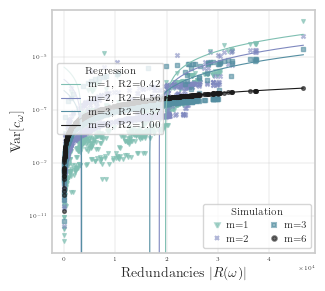

In [191]:
# Create a figure with shared y-axis
sns.set(style="whitegrid")
matplotlib.rcParams.update({
    "pgf.preamble": (r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"), 
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
matplotlib.rcParams['text.latex.preamble'] = (r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}")

label_fontsize=10
legend_fontsize=7
epsilon_fontsize=7
linewidth=.8
markersize = 7
text_fontsize=11
ticks_fontsize=4
matplotlib.rcParams['xtick.labelsize'] = ticks_fontsize 
matplotlib.rcParams['ytick.labelsize'] = ticks_fontsize
degree = 2


line_handles = []

plt.figure(figsize=(3.4, 3.15))
# Fit var_blocks_small, var_blocks_big and var_global2d separately and plot them together
# Put in the legend label the coefficients of the polynomial and the R value
# Use a for loop
# Fit var_blocks_one
print("m=1")
x = np.array(redundancies).reshape(-1, 1)
y = var_blocks_one
polynomial_features = PolynomialFeatures(degree=degree)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(x, y)
y_pred = pipeline.predict(x)
x_finer, y_pred_finer, pipeline = fit_and_predict(x, y, degree)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = pipeline.score(x, y)
print("RMSE: ", rmse)
print("R2: ", r2)
print("coeffs",pipeline.named_steps["linear_regression"].coef_)
plt.scatter(redundancies, var_blocks_one, label="m=1",marker = "v", color = "#7fbfb2",s=markersize,alpha=0.6)
line_handle, = plt.plot(x_finer, y_pred_finer, label="m=1, R2={:.2f}".format(r2), color = "#7fbfb2",linewidth=linewidth)
line_handles.append(line_handle)
# Fit var_blocks_small
print("m=2")
x = np.array(redundancies).reshape(-1, 1)
y = var_blocks_small
polynomial_features = PolynomialFeatures(degree=degree)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(x, y)
y_pred = pipeline.predict(x)
x_finer, y_pred_finer, pipeline = fit_and_predict(x, y, degree)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = pipeline.score(x, y)
print("RMSE: ", rmse)
print("R2: ", r2)
print("coeffs",pipeline.named_steps["linear_regression"].coef_)
plt.scatter(redundancies, var_blocks_small, label="m=2",marker = "x",color="#7f88bf",s=markersize*1.2,alpha=0.6)
line_handle, = plt.plot(x_finer, y_pred_finer, label="m=2, R2={:.2f}".format(r2),color="#7f88bf",linewidth=linewidth)
line_handles.append(line_handle)
# Fit var_blocks_big
print("m=3")
x = np.array(redundancies).reshape(-1, 1)
y = var_blocks_big
polynomial_features = PolynomialFeatures(degree=degree)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(x, y)
y_pred = pipeline.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = pipeline.score(x, y)

print("RMSE: ", rmse)
print("R2: ", r2)
print("coeffs",pipeline.named_steps["linear_regression"].coef_)
plt.scatter(redundancies, var_blocks_big, label="m=3",marker="s",color="#548ea1",s=markersize,alpha=0.6)
x_finer, y_pred_finer, pipeline = fit_and_predict(x, y, degree)
line_handle, = plt.plot(x_finer, y_pred_finer, label="m=3, R2={:.2f}".format(r2),color="#548ea1",linewidth=linewidth)
line_handles.append(line_handle)
# Fit var_global2d
print("m=6")
x = np.array(redundancies).reshape(-1, 1)
y = var_global2d
polynomial_features = PolynomialFeatures(degree=degree)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(x, y)
y_pred = pipeline.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = pipeline.score(x, y)

print("RMSE: ", rmse)
print("R2: ", r2)
print("coeffs",pipeline.named_steps["linear_regression"].coef_)
plt.scatter(redundancies, var_global2d, label="m=6",marker = "o",color="k",s=markersize,alpha=0.6)
x_finer, y_pred_finer, pipeline = fit_and_predict(x, y, degree)
line_handle, = plt.plot(x_finer, y_pred_finer, label="m=6, R2={:.2f}".format(r2), color = 'k',linewidth=linewidth)
line_handles.append(line_handle)
# Set the formatter for the y-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel(r"Redundancies $|R(\omega)|$",fontsize=label_fontsize)
plt.ylabel(r"$\Var[c_\omega]$",fontsize=label_fontsize)

scatter_legend_entries = []
scatter_colors = ["#7fbfb2", "#7f88bf","#548ea1", "k"]  # Add colors in the order of your scatter plots
scatter_labels = ["m=1", "m=2", "m=3","m=6"]  # Add labels in the order of your scatter plots
marker_list = ["v", "x","s", "o"]
for color, label,marker in zip(scatter_colors, scatter_labels,marker_list):
    scatter_legend_entries.append(Line2D([0], [0], linestyle="none", marker=marker, alpha=0.6, color=color, label=label, markeredgewidth=1.5, markersize=3.2))

legend1 = plt.legend(handles=scatter_legend_entries, title="Simulation", title_fontsize=legend_fontsize, fontsize=legend_fontsize, handletextpad=0,ncol=2,columnspacing=1.5)
legend2 = plt.legend(handles=line_handles,title="Regression", title_fontsize=legend_fontsize, fontsize=legend_fontsize, ncol=1,loc="upper left", bbox_to_anchor=(0,.8))
plt.tick_params(axis='x', pad=-3)  # Adjust padding for x-axis ticks
plt.tick_params(axis='y', pad=-2)
plt.gca().add_artist(legend1)
plt.grid(linewidth=.3)
plt.yscale('log')
#plt.savefig("Plots/figs_numerics/var_vs_redundancies.pgf", bbox_inches='tight')
plt.show()



m= 1
RMSE:  8.559248548217248e-06
R2:  0.07331870039220978
coeffs [0.00000000e+00 2.65593596e-10]


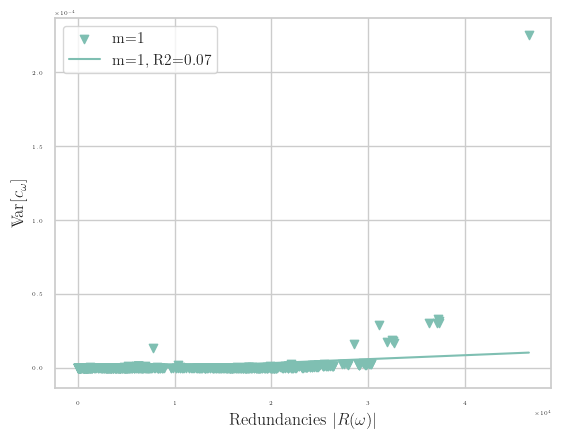

m= 1
RMSE:  2.787278428637911e-06
R2:  0.1466636419963171
coeffs [0.00000000e+00 1.27473891e-10]


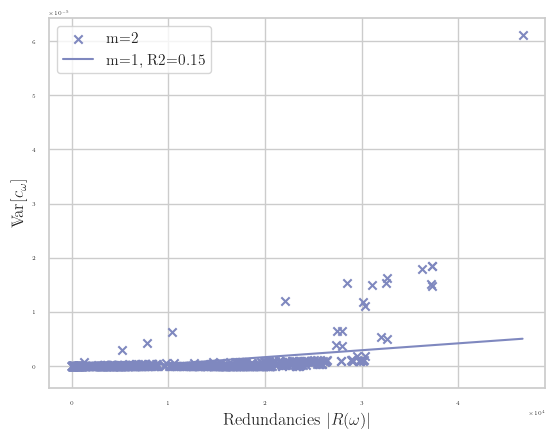

m= 1
RMSE:  1.1881861688016651e-06
R2:  0.2161953261502283
coeffs [0.00000000e+00 6.88404183e-11]


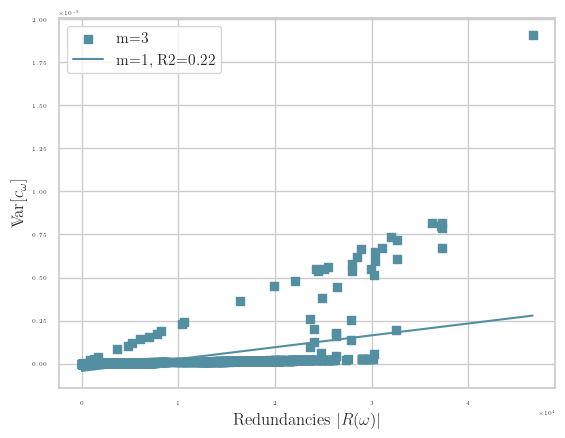

m= 1
RMSE:  3.6926872369683013e-09
R2:  0.9991685145637602
coeffs [0.00000000e+00 1.41212894e-11]


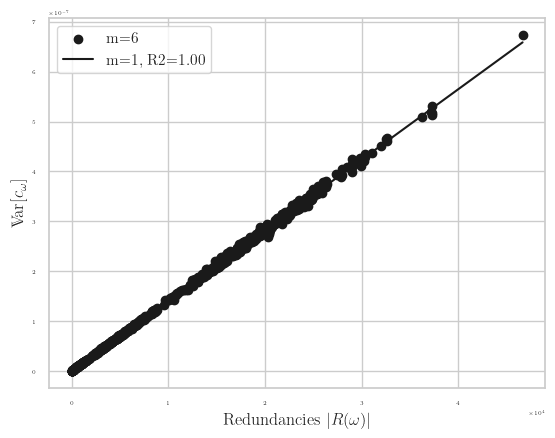

enhanced_pauli_encoding


In [192]:
# Fit var_global2d
for degree in [1]:
    for m in [1,2,3,6]:
        colors = {1:"#7fbfb2", 2:"#7f88bf", 3:"#548ea1", 6:"k"}
        markers = {1:"v", 2:"x", 3:"s", 6:"o"}
        vars = {1:var_blocks_one, 2:var_blocks_small, 3:var_blocks_big, 6:var_global2d}
        print("m=",degree)
        x = np.array(redundancies).reshape(-1, 1)
        y = vars[m]
        color = colors[m]
        marker = markers[m] 
        polynomial_features = PolynomialFeatures(degree=degree)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
        pipeline.fit(x, y)
        y_pred = pipeline.predict(x)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = pipeline.score(x, y)

        print("RMSE: ", rmse)
        print("R2: ", r2)
        print("coeffs",pipeline.named_steps["linear_regression"].coef_)
        plt.scatter(redundancies, vars[m], label="m="+str(m),marker = marker,color=color)
        plt.plot(x, y_pred, label="m={:}, R2={:.2f}".format(degree,r2), color = color)
        # Set the formatter for the y-axis
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-1,1))
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.gca().xaxis.set_major_formatter(formatter)
        plt.xlabel(r"Redundancies $|R(\omega)|$")
        plt.ylabel(r"$\Var[c_\omega]$")
        plt.legend()
        plt.savefig("unique_enhanced_m={m}_degree_{degree}.png".format(m=m, degree=degree))
        plt.show()
print(encoding)

In [15]:
len(redundancies)

729